## Лабораторная работа №6. Градиентные методы в решении задач машинного обучения.
### Часть 2. Логистическая регрессия.

Используемый набор данных: [banknote authentication](https://archive.ics.uci.edu/ml/datasets/banknote+authentication)

In [1]:
from IPython.display import display
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_curve, roc_auc_score
from sklearn.feature_selection import RFE
import os
import requests

%matplotlib inline

pd.options.display.max_columns = None

In [2]:
def downloadFile(url, filePath):
    if not os.path.exists(filePath):
        req = requests.get(url)
        f = open(filePath, "wb")
        f.write(req.content)
        f.close

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00267/data_banknote_authentication.txt"
fileName = "dataset/data_banknote_authentication.txt"
downloadFile(url, fileName)

In [3]:
headers = ["Variance", "Skewness", "Curtosis", "Entropy", "Class"]  
data = pd.read_csv(fileName, names=headers)
data.sample(40)

,Variance,Skewness,Curtosis,Entropy,Class
321,3.73520,9.59110,-3.903200,-3.348700,0
757,2.66060,3.16810,1.961900,0.186620,0
56,2.56350,6.77690,-0.619790,0.385760,0
737,4.15420,7.27560,-2.476600,-1.209900,0
1197,-0.82053,0.65181,-0.488690,-0.527160,1
1021,-1.27920,2.13760,-0.475840,-1.397400,1
8,3.20320,5.75880,-0.753450,-0.612510,0
1346,1.25720,4.87310,-5.286100,-5.874100,1
479,2.09620,2.47690,1.937900,-0.040962,0
289,3.24220,6.22650,0.122240,-1.446600,0


In [4]:
display(data.isna().sum())
display(data.describe())

Variance    0
Skewness    0
Curtosis    0
Entropy     0
Class       0
dtype: int64

,Variance,Skewness,Curtosis,Entropy,Class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


Выделим из множества признаков существенные для моделирования.

In [5]:
X = data.drop(columns=["Class"]).copy()
y = data["Class"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=25)
LR = LogisticRegression()

In [6]:
rfe = RFE(LR, n_features_to_select=len(X_train.columns))
rfe.fit(X_train, y_train)
rfe.support_

array([ True,  True,  True,  True])

Все признаки существенны для моделирования.

In [7]:
y_pred = LR.fit(X_train, y_train).predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       273
           1       0.99      1.00      0.99       208

    accuracy                           0.99       481
   macro avg       0.99      0.99      0.99       481
weighted avg       0.99      0.99      0.99       481



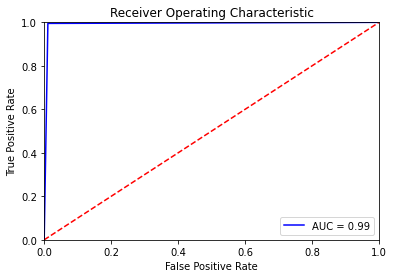

In [8]:
fpr, tpr, _ = roc_curve(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = "AUC = %0.2f"%auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Величина AUC говорит о качестве классификации.